## Cotton Disease Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import tensorflow as tf

In [4]:
import tensorflow.keras

In [5]:
print(tf.__version__)

2.4.0


In [1]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import ReLU,LeakyReLU,Activation,Flatten,Dense,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.activations import sigmoid,relu,softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from tensorflow.keras.applications.vgg19 import VGG19

In [3]:
image_size = [224,224]


In [4]:
vgg19 = VGG19(input_shape=image_size + [3] , weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [5]:
for layers in vgg19.layers:
  layers.trainable = False

In [6]:
from glob import glob

In [7]:
x = Flatten()(vgg19.output)

In [8]:
a = glob('/content/drive/MyDrive/Projects ME/Cotton Disease Prediction/train/*')

In [9]:
len(a)

4

In [10]:
prediction = Dense(len(a),activation='softmax')(x)

In [11]:
model = Model(inputs=vgg19.inputs,outputs = prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [14]:
train_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [15]:
training_data = train_data.flow_from_directory("/content/drive/MyDrive/Projects ME/Cotton perfect/Cotton Disease Prediction/train",
                                               target_size=(224,224),batch_size=32,class_mode='categorical')
testing_data = test_data.flow_from_directory("/content/drive/MyDrive/Projects ME/Cotton perfect/Cotton Disease Prediction/val",
                                             target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1966 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [16]:
epochs = 30

In [17]:
model.fit(training_data,validation_data=testing_data,epochs=epochs,steps_per_epoch=len(training_data),validation_steps=len(testing_data))

Epoch 1/30
62/62 [==============================] - 1222s 20s/step - loss: 1.3694 - accuracy: 0.5482 - val_loss: 0.3044 - val_accuracy: 0.8796
Epoch 2/30
62/62 [==============================] - 41s 666ms/step - loss: 0.3434 - accuracy: 0.8716 - val_loss: 0.2706 - val_accuracy: 0.8858
Epoch 3/30
62/62 [==============================] - 41s 662ms/step - loss: 0.2324 - accuracy: 0.9155 - val_loss: 0.2094 - val_accuracy: 0.9136
Epoch 4/30
62/62 [==============================] - 41s 658ms/step - loss: 0.1855 - accuracy: 0.9317 - val_loss: 0.3253 - val_accuracy: 0.8549
Epoch 5/30
62/62 [==============================] - 41s 663ms/step - loss: 0.2658 - accuracy: 0.8960 - val_loss: 0.1738 - val_accuracy: 0.9167
Epoch 6/30
62/62 [==============================] - 41s 663ms/step - loss: 0.1260 - accuracy: 0.9607 - val_loss: 0.1514 - val_accuracy: 0.9475
Epoch 7/30
62/62 [==============================] - 41s 664ms/step - loss: 0.1277 - accuracy: 0.9621 - val_loss: 0.1894 - val_accuracy: 0.9105

In [18]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
train_loss = model.history.history['loss']

In [20]:
train_loss

[0.8014101386070251,
 0.3325330913066864,
 0.22993090748786926,
 0.1963825672864914,
 0.23798972368240356,
 0.13917341828346252,
 0.1426035761833191,
 0.0951007753610611,
 0.09364964067935944,
 0.10422728955745697,
 0.09266946464776993,
 0.08755438774824142,
 0.07803195714950562,
 0.06569907069206238,
 0.08119180053472519,
 0.08172053098678589,
 0.06164862960577011,
 0.05173822492361069,
 0.04070577025413513,
 0.042817145586013794,
 0.03922312706708908,
 0.03356930986046791,
 0.03450702130794525,
 0.05386556312441826,
 0.07164181023836136,
 0.03309360891580582,
 0.03702215850353241,
 0.02517092041671276,
 0.023528998717665672,
 0.03906254842877388]

In [21]:
train_accuracy = model.history.history['accuracy']
train_accuracy

[0.7095625400543213,
 0.8708036541938782,
 0.9150559306144714,
 0.9272634983062744,
 0.904374361038208,
 0.9577823281288147,
 0.952187180519104,
 0.9715157747268677,
 0.9694811701774597,
 0.9628687500953674,
 0.9699898362159729,
 0.9699898362159729,
 0.9730417132377625,
 0.9786368012428284,
 0.9704985022544861,
 0.9694811701774597,
 0.9776195287704468,
 0.9857578873634338,
 0.9908443689346313,
 0.9877924919128418,
 0.9888097643852234,
 0.9949135184288025,
 0.9923703074455261,
 0.9791454672813416,
 0.9735503792762756,
 0.9913529753684998,
 0.9867751598358154,
 0.9959308505058289,
 0.9964394569396973,
 0.9877924919128418]

In [22]:
test_loss = model.history.history['loss']
test_loss

[0.8014101386070251,
 0.3325330913066864,
 0.22993090748786926,
 0.1963825672864914,
 0.23798972368240356,
 0.13917341828346252,
 0.1426035761833191,
 0.0951007753610611,
 0.09364964067935944,
 0.10422728955745697,
 0.09266946464776993,
 0.08755438774824142,
 0.07803195714950562,
 0.06569907069206238,
 0.08119180053472519,
 0.08172053098678589,
 0.06164862960577011,
 0.05173822492361069,
 0.04070577025413513,
 0.042817145586013794,
 0.03922312706708908,
 0.03356930986046791,
 0.03450702130794525,
 0.05386556312441826,
 0.07164181023836136,
 0.03309360891580582,
 0.03702215850353241,
 0.02517092041671276,
 0.023528998717665672,
 0.03906254842877388]

In [23]:
test_accuracy = model.history.history['accuracy']
test_accuracy

[0.7095625400543213,
 0.8708036541938782,
 0.9150559306144714,
 0.9272634983062744,
 0.904374361038208,
 0.9577823281288147,
 0.952187180519104,
 0.9715157747268677,
 0.9694811701774597,
 0.9628687500953674,
 0.9699898362159729,
 0.9699898362159729,
 0.9730417132377625,
 0.9786368012428284,
 0.9704985022544861,
 0.9694811701774597,
 0.9776195287704468,
 0.9857578873634338,
 0.9908443689346313,
 0.9877924919128418,
 0.9888097643852234,
 0.9949135184288025,
 0.9923703074455261,
 0.9791454672813416,
 0.9735503792762756,
 0.9913529753684998,
 0.9867751598358154,
 0.9959308505058289,
 0.9964394569396973,
 0.9877924919128418]

In [24]:
import matplotlib.pyplot as plt
import numpy as np

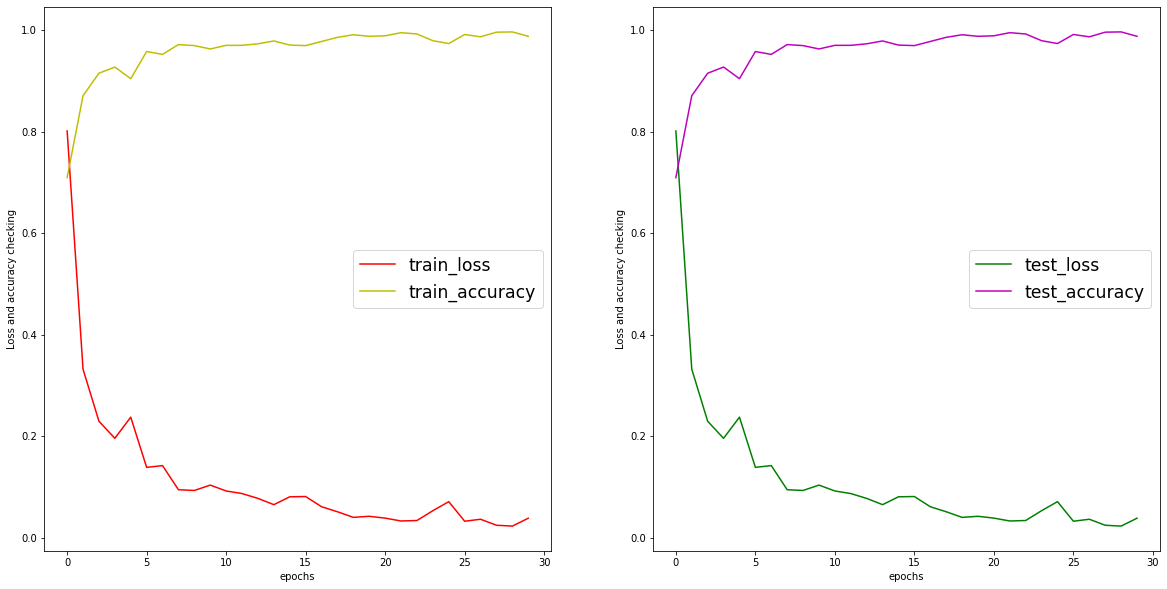

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(epochs),train_loss,color='r',label='train_loss')
plt.plot(np.arange(epochs),train_accuracy,color='y',label='train_accuracy')
plt.legend(loc='best',fontsize='xx-large')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.subplot(1,2,2)
plt.plot(np.arange(epochs),test_loss,color='g',label='test_loss')
plt.plot(np.arange(epochs),test_accuracy,color='m',label='test_accuracy')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.legend(loc='best',fontsize='xx-large')
plt.show()

In [28]:
labels = ['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']

In [29]:
labels

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [32]:
from tensorflow.keras.preprocessing import image

In [36]:
classes = {0:'diseased cotton leaf',1:'diseased cotton plant',2:'fresh cotton leaf',3:'fresh cotton plant'}
for i in classes.items():
  print(i)

(0, 'diseased cotton leaf')
(1, 'diseased cotton plant')
(2, 'fresh cotton leaf')
(3, 'fresh cotton plant')


[[0.000000e+00 1.000000e+00 1.815859e-28 0.000000e+00]]
[1]
diseased cotton plant


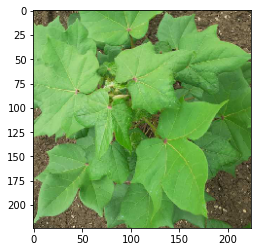

In [41]:
image_path = '/content/drive/MyDrive/Projects ME/Cotton perfect/Cotton Disease Prediction/train/diseased cotton plant/dd (114)_iaip.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[1. 0. 0. 0.]]
[0]
diseased cotton leaf


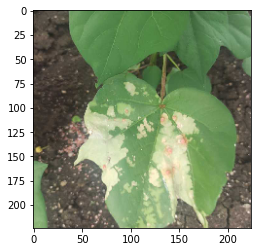

In [42]:
image_path = '/content/drive/MyDrive/Projects ME/Cotton perfect/Cotton Disease Prediction/train/diseased cotton leaf/dis_leaf (109)_iaip.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[2.6005085e-31 1.0000000e+00 0.0000000e+00 0.0000000e+00]]
[1]
diseased cotton plant


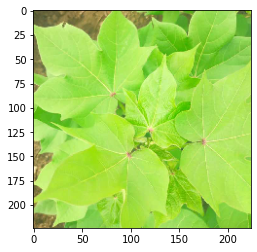

In [43]:
image_path = '/content/drive/MyDrive/Projects ME/Cotton perfect/Cotton Disease Prediction/train/fresh cotton plant/dsd (138)_iaip.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[0.0000000e+00 5.1202712e-26 1.0000000e+00 0.0000000e+00]]
[2]
fresh cotton leaf


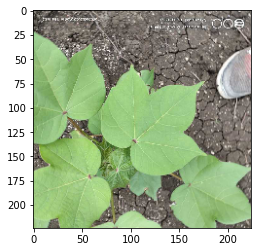

In [44]:
image_path = '/content/drive/MyDrive/Projects ME/Cotton perfect/Cotton Disease Prediction/train/fresh cotton leaf/d (101)_iaip.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[1.0000000e+00 7.2238402e-37 3.8000863e-19 0.0000000e+00]]
[0]
diseased cotton leaf


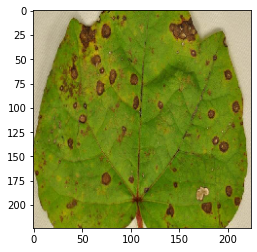

In [45]:
image_path = '/content/drive/MyDrive/Projects ME/Cercospora-Leaf-Spot-lesions.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)